In [1]:
%matplotlib notebook
import numpy as np
import os, string
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import tensorflow as tf

xs = np.linspace(0,20,100)
ys = np.linspace(0,20,100)

In [2]:
X, Y = np.meshgrid(xs,ys)
A1 = 3.
mu1 = 5.
sigma1 = 13.
A2 = 4.
mu2 = 15.
sigma2 = 7.
x = A1 * np.exp(-(xs-mu1)**2/ sigma1) + A2 * np.exp(-(xs-mu2)**2/ sigma2)
y = A2 * np.exp(-(ys-mu1)**2/ sigma1) + A1 * np.exp(-(ys-mu2)**2/ sigma2)
#X, Y = np.meshgrid(x,y)
mesh = np.dot(np.mat(x).T , np.mat(y))

In [111]:
pnum = 50
pPos = np.mat(np.random.random((pnum,2))*20.)#+10.np.ones((50,2))*10.
#print(pPos)
pV = np.mat(-.5 + np.random.random((pnum,2)))#speed
#print(pV)
pBestPos = np.mat(pPos.copy())
pBestFit = np.mat(np.zeros((100,1)))
pFit = np.mat(pBestFit.copy())
gBestPos = np.mat(pPos[0,:].copy())
gFit = 0

In [115]:
for n in range(10):
    #if i % 100 == 0:
    #    print(i)
    #update_par
    pPos += pV
    pPos[:,0] = np.minimum(pPos[:,0],20.)
    pPos[:,0] = np.maximum(pPos[:,0],0.)
    pPos[:,1] = np.minimum(pPos[:,1],20.)
    pPos[:,1] = np.maximum(pPos[:,1],0.)
    tmp1 = A1 * np.exp(-np.square(pPos[:,0]-mu1)/ sigma1) + A2 * np.exp(-np.square(pPos[:,0]-mu2)/ sigma2)
    tmp2 = A2 * np.exp(-np.square(pPos[:,1]-mu1)/ sigma1) + A1 * np.exp(-np.square(pPos[:,1]-mu2)/ sigma2)
    pFit = np.multiply(tmp1,tmp2 )
    #print(pFit)
    #print(pFit.shape)
    #par.vx=par.vx+c1*rand()*(par_best.x-par.x)+c2*rand()*(par.bestx-par.x)
    #print((np.dot(np.random.random((100)), (pBestPos[:,0]-pPos[:,0]))).shape)
    #print(np.subtract(gBestPos[0,0],pPos[:,0]).shape)
    a1 = np.random.random((pnum,1))
    a2 = np.random.random((pnum,1))
    pV *= 0.3
    pV += 0.3*np.multiply(np.hstack([a1,a1]), (pBestPos-pPos))
    pV += 0.4*np.multiply(np.hstack([a2,a2]), (gBestPos-pPos))
    #pV[:,0] += np.multiply(np.random.random((pnum,1)), (pBestPos[:,0]-pPos[:,0]))
    #pV[:,0] += np.multiply(np.random.random((pnum,1)), (gBestPos[0,0]-pPos[:,0]))
    #pV[:,1] += np.multiply(np.random.random((pnum,1)), (pBestPos[:,1]-pPos[:,1]))
    #pV[:,1] += np.multiply(np.random.random((pnum,1)), (gBestPos[0,1]-pPos[:,1]))
    #print(pFit.shape[0])
    for i in range(pFit.shape[0]):
        if pFit[i] > pBestFit[i]:
            #print('fit:',pBestFit[i],pFit[i])
            #print('pos:',pBestPos[i,:],pPos[i,:])
            #print('pv:',pV[i,:])
            pBestFit[i] = pFit[i]
            pBestPos[i,:]=pPos[i,:]
            
#     logic = np.array(pFit) > np.array(pBestFit)
#     ind = np.array(np.where(logic!=False)[0])
#     pBestFit[ind] = pFit[ind,0]
#     pBestPos[ind,:] = pPos[ind,:]

    if gFit < np.max(pBestFit):
        ind = np.argmax(pBestFit)
        #print('g',n,ind)
        gFit = pBestFit[ind]
        gBestPos = pBestPos[ind]
        print('gpos,gfit:',gBestPos,gFit)
   

gpos,gfit: [[ 15.00544319   5.11643657]] [[ 15.98868991]]
gpos,gfit: [[ 14.92830079   5.03968547]] [[ 15.99243685]]
gpos,gfit: [[ 14.97143942   5.08525592]] [[ 15.9949211]]


<IPython.core.display.Javascript object>


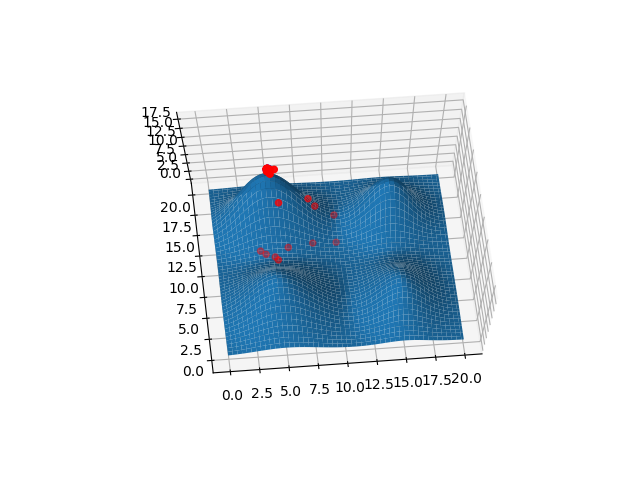

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,mesh)
ax.scatter(np.array(pPos[:,1]),np.array(pPos[:,0]),np.array(pFit+2.),s=20, c='r')
ax.scatter(np.array(gBestPos[:,1]),np.array(gBestPos[:,0]),np.array(gFit+2.),s=40, c='b')

In [3]:
with tf.device('/gpu:0'):
    inputX = tf.placeholder('float',shape=[100,])
    inputY = tf.placeholder('float',shape=[100,])
    inputpVX = tf.placeholder('float',shape=[100,])
    inputpVY = tf.placeholder('float',shape=[100,])
    inputpFit = tf.placeholder('float',shape=[100,])
    inputpBestX = tf.placeholder('float',shape=[100,])
    inputpBestY = tf.placeholder('float',shape=[100,])
    inputpBestFit = tf.placeholder('float',shape=[100,])
    inputgBestX = tf.placeholder('float',shape=None)
    inputgBestY = tf.placeholder('float',shape=None)
    inputgFit = tf.placeholder('float',shape=None)
    
    pX = tf.Variable(tf.random_uniform([100,]) * 20.)#tf.random_uniform([100,]) * 20.
    pY = tf.Variable(tf.random_uniform([100,]) * 20.)
    pVX = tf.Variable(tf.random_uniform([100,]) * 20.)
    pVY = tf.Variable(tf.random_uniform([100,]) * 20.)
    pBestX = tf.Variable(tf.random_uniform([100,]) * 20.)#pX
    pBestY = tf.Variable(tf.random_uniform([100,]) * 20.)
    pBestFit = tf.Variable(tf.random_uniform([100,]) * 20.)
    pFit = tf.Variable(tf.random_uniform([100,]) * 20.)
    gBestX = tf.Variable(0.)
    gBestY = tf.Variable(0.)
    gFit = tf.Variable(0.)
    #test = tf.Variable(0.)
    
    pX = inputX
    pY = inputY
    pVX = inputpVX
    pVY = inputpVY
    pFit = inputpFit
    pBestX = inputpBestX
    pBestY = inputpBestY
    pBestFit = inputpBestFit
    gBestX = inputgBestX
    gBestY = inputgBestY
    gFit = inputgFit

    pX += pVX
    pY += pVY
    pX = tf.minimum(pX,20.)
    pY = tf.minimum(pY,20.)
    pX = tf.maximum(pX,0.)
    pY = tf.maximum(pY,0.)
    #print('pX:',pX.get_shape())
    tmp1 = A1 * tf.exp(-tf.square(pX - mu1) / sigma1) + A2 * tf.exp(-tf.square(pX-mu2)/ sigma2)
    tmp2 = A2 * tf.exp(-tf.square(pY - mu1) / sigma1) + A1 * tf.exp(-tf.square(pY-mu2)/ sigma2)
    #print(tmp1.get_shape(),tmp2.get_shape())
    pFit = tf.multiply(tmp1,tmp2)
    #print(pFit.get_shape())
    r1 = tf.random_uniform((100,))
    r2 = tf.random_uniform((100,))
    pVX *= 0.3
    pVY *= 0.3
    pVX += 0.3 * tf.multiply(r1, (pBestX-pX))
    pVX += 0.4 * tf.multiply(r2, (gBestX-pX))
    pVY += 0.3 * tf.multiply(r1, (pBestY-pY))
    pVY += 0.4 * tf.multiply(r2, (gBestY-pY))
    #print('pVX:',pVX.get_shape())
    logic = pFit > pBestFit
    #print(pFit.get_shape(),pBestFit.get_shape())
    #print(logic.get_shape())
    pBestFit  = tf.where(logic,pFit, pBestFit)
    pBestX  = tf.where(logic,pX, pBestX)
    pBestY  = tf.where(logic,pY, pBestY)
    pmaxBestFit = tf.reduce_max(pBestFit)
    #print(pmaxBestFit.get_shape(),gFit.get_shape())
    boolCond = tf.greater(pmaxBestFit,gFit)
    #print(boolCond.eval(),boolCond.get_shape())
    ind = tf.cast(tf.arg_max(pBestFit,dimension=0),tf.int32)
    #test = ind
    #print('test:',test.eval())
    gBestX = tf.cond(boolCond, lambda: pBestX[ind], lambda: tf.abs(gBestX))
    gBestY = tf.cond(boolCond, lambda: pBestY[ind], lambda: tf.abs(gBestY))
    gFit = tf.cond(boolCond, lambda: tf.abs(pmaxBestFit), lambda : tf.abs(gFit))

In [4]:
resX = np.random.random((100,))*20.
resY = np.random.random((100,))*20.
resZ = np.zeros_like(resX)
resBestZ = np.zeros_like(resX)
resBestX = np.zeros_like(resX)
resBestY = np.zeros_like(resX)
resVX = np.random.random((100,))
resVY = np.random.random((100,))
gresX = resX[0]
gresY = resY[0]
gresZ = 0.
config = tf.ConfigProto(allow_soft_placement = True)

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        resX,resY,resVX,resVY,resZ,resBestZ,resBestX,resBestY,gresX,gresY,gresZ\
        = sess.run([pX,pY,pVX, pVY,pFit,pBestFit,\
                    pBestX, pBestY,gBestX,gBestY,gFit], \
                   feed_dict={inputX:resX, inputY:resY,\
                              inputpVX:resVX, inputpVY:resVY,inputpFit:resZ,inputpBestX:resBestX,inputpBestY:resBestY,\
                              inputpBestFit:resBestZ,inputgBestX:gresX,inputgBestY:gresY, inputgFit:gresZ})
print(gresX,gresY,gresZ)

15.0911 4.97666 15.9851


<IPython.core.display.Javascript object>


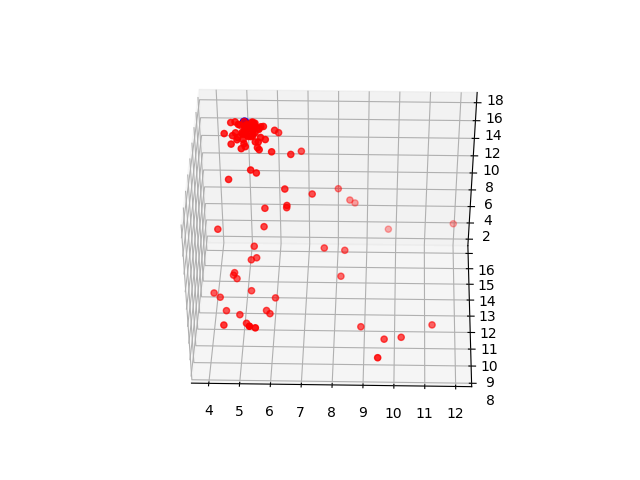

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X,Y,mesh)
ax.scatter(np.array(resY),np.array(resX),np.array(resZ+2.),s=20, c='r')
ax.scatter(np.array(gresY),np.array(gresX),np.array(gresZ+2.),s=40, c='b')

In [7]:
print(tf.trainable_variables())
tf.reset_default_graph()
print(tf.trainable_variables())

[<tensorflow.python.ops.variables.Variable object at 0x0000000005CB2550>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CB2518>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CB2CF8>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CB2668>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CCE4E0>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CB65F8>, <tensorflow.python.ops.variables.Variable object at 0x0000000005CF0B70>, <tensorflow.python.ops.variables.Variable object at 0x0000000005D16D30>, <tensorflow.python.ops.variables.Variable object at 0x0000000005D03B70>, <tensorflow.python.ops.variables.Variable object at 0x0000000005D35048>, <tensorflow.python.ops.variables.Variable object at 0x0000000005D2AF28>]
[]
